
<img src="1519895156650.png" style="float:left">

# The Sparks Foundation
## Task 1 : Prediction using Supervised ML (Level-Beginner)

### By- Satyam Tiwari 
#### (Data Science & Business Analytics  Intern)

   ###    In this task we'll try to predict the percentage of an student based on the no. of study hours using simple linear regression.



### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")

### Showing some of Data 

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Getting dimension of the Data

In [4]:
print ("dimension of the data is  :",df.shape)

dimension of the data is  : (25, 2)


### Getting some statistical measures

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Printing a concise summary of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visulising the Data

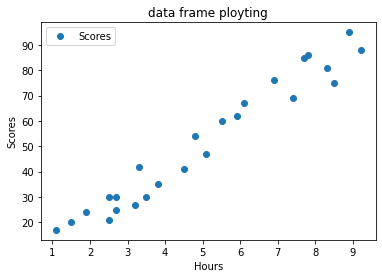

In [7]:
df.plot(x='Hours',y='Scores',style='o');
plt.title("data frame ployting")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Cheaking for Outliars

<AxesSubplot:xlabel='Hours'>

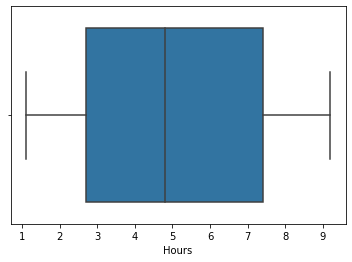

In [8]:
sns.boxplot(x=df['Hours'])

<AxesSubplot:xlabel='Scores'>

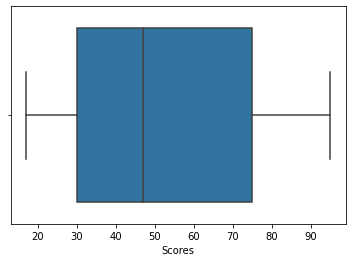

In [9]:
sns.boxplot(x=df['Scores'])

#### No outliers are found in Box plot

# Linear Regression Model

### Preparing the Data

In [10]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

### Spliting the dataframes into training set and testing set

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

####  In this we are going to train the 80% & test the 20% of the Data

### Train Data sets

In [12]:
X_train

array([[7.4],
       [6.9],
       [4.8],
       [9.2],
       [4.5],
       [3.5],
       [7.8],
       [2.5],
       [5.1],
       [2.7],
       [1.1],
       [1.9],
       [6.1],
       [3.2],
       [7.7],
       [2.5],
       [8.9],
       [5.5],
       [8.5],
       [8.3]])

In [13]:
y_train

array([69, 76, 54, 88, 41, 30, 86, 21, 47, 30, 17, 24, 67, 27, 85, 30, 95,
       60, 75, 81], dtype=int64)

### Test Data sets

In [14]:
X_test

array([[2.7],
       [3.8],
       [3.3],
       [5.9],
       [1.5]])

In [15]:
y_test

array([25, 35, 42, 62, 20], dtype=int64)

### Length of the Train Data sets

In [16]:
len(X_train), len(y_train)

(20, 20)

### Length of the Test Data sets

In [17]:
len(X_test),len(y_test)

(5, 5)

### Training the Data sets

In [18]:
from sklearn.linear_model import LinearRegression
regg=LinearRegression()
regg.fit(X_train, y_train)

LinearRegression()

### Finding accuracy of the model

In [19]:
regg.score(X_test,y_test)

0.9050356232459791

#### Accuracy of Model is 90%

### Finding Slope(m)

In [20]:
m=regg.coef_
m

array([9.83544438])

### Finding Intercept(c)

In [21]:
c=regg.intercept_
c

1.9894231109746912

### Finding Line

In [22]:
line=m*X+c
line

array([[26.57803407],
       [52.15018946],
       [33.46284514],
       [85.59070036],
       [36.41347845],
       [16.74258969],
       [92.47551143],
       [56.08436722],
       [83.62361149],
       [28.54512294],
       [77.72234486],
       [60.01854497],
       [46.24892283],
       [34.44638957],
       [12.80841193],
       [89.52487812],
       [26.57803407],
       [20.67676744],
       [61.98563385],
       [74.77171154],
       [28.54512294],
       [49.19955615],
       [39.36411177],
       [69.85398935],
       [78.7058893 ]])

### Plotting Scatter plot for the test data with regression line

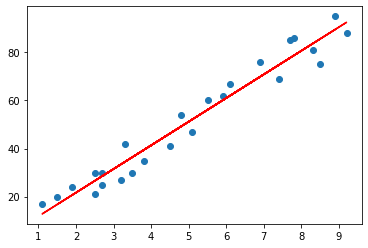

In [23]:
plt.scatter(X,y)
plt.plot(X,line,'r')
plt.show()

### Predicting the Scores

In [24]:
y_pred=regg.predict(X_test)
y_pred

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

### Cheaking the difference between the Actual & Predicted Values

In [25]:
actual_pred=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
actual_pred

,Actual Data,Predicted Data
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


### Predicting the score as per the hours study

In [26]:
hours_study=9.25
pred_score=regg.predict([[hours_study]])
pred_score

array([92.96728365])

## As per model prediction, a student will get score of 93%(approx) 
## if he/she study for 9.25 hours

#### Finding one more thing i.e. Mean Absolute Error 

In [27]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  4.140342096254413
